# Análisis estadístico de los niveles de ruido en una avenida

En este notebook se presenta el análisis estadístico de los datos recabados por los sonómetros desplegados en la avenida Eje 5 Norte. La finalidad es conocer los niveles de ruido a los que se expone la población cercana. En particular, son de interés los siguientes parámetros estadísticos:

* El intervalo de tiempo durante el cual el nivel de ruido acústico rebasa los 65 dB. Este parámetro lo denotaremos como $t_{65}$.
* El tiempo entre eventos en los que el nivel de ruido rebasa los 65 dB. Este parámetro lo denotaremos como $t_e$.
* El valor promedio del nivel de ruido cuando rebasa el umbral de 65db. Este parámetro se se denota como $L_{65}$.

Los parámetros anteriormente mencionados son variables aleatorias, por lo que el programa computacional a desarrollar obtendrá el histograma normalizado de cada una de ellas, así como algunos de sus momentos estadísticos (valor medio, coeficiente de variación, entre otros).


## Características del sistema de adquisición de niveles de ruido

Se trata de una red de cuatro sonómetros desplegados en la Avenida Eje 5 Norte, al lado de la estación de Metrobús UAM Azcapotzalco. Los sonómetros midieron el nivel equivalente de ruido (Leq) cada segundo y enviaron los datos a un servidor central. Las mediciones se realizaron el día 28 de mayo, desde las 7:30 a.m. hasta el 29 de mayo a las 6:00 a.m.


<img src="despliegue_nodos.png">



In [92]:
import pandas as pd

df1=pd.read_csv('dataframe_sono1.csv')
df2=pd.read_csv('dataframe_sono2.csv')
df3=pd.read_csv('dataframe_sono3.csv')
df4=pd.read_csv('dataframe_sono4.csv')
df = {'sono1':df1, 'sono2':df2, 'sono3':df3, 'sono4':df4}
for sono in df:
    df[sono]['time'] = pd.to_datetime(df[sono]['time'])

In [93]:
# ajuste de offset para el sonometro 3
df['sono3']['value'] = df['sono3']['value']+8
# limitar los datos hasta las 6:00 del 29 de marzo
df['sono1']=df['sono1'][(df['sono1']['time'] <= '2024-05-29 05:59:59')]

## Analisis general
A continuación se presenta un analisis general de los datos recabados por los sonómetros. 

La siguiente grafica muestra el promedio por hora del ruido registrado por los cuatro sonómetros.

In [94]:
# gráfica del promedio del Leq por cada hora
# agrupar los valores de cada dataframe por hora
df1_hour = df['sono1'].resample('h', on='time').mean()
df2_hour = df['sono2'].resample('h', on='time').mean()
df3_hour = df['sono3'].resample('h', on='time').mean()
df4_hour = df['sono4'].resample('h', on='time').mean()
df_hour = pd.concat([df1_hour, df2_hour, df3_hour, df4_hour], axis=1)
df_hour.columns = ['value_df1', 'value_df2', 'value_df3', 'value_df4']
df_hour['mean_value'] = df_hour.mean(axis=1, skipna=True)


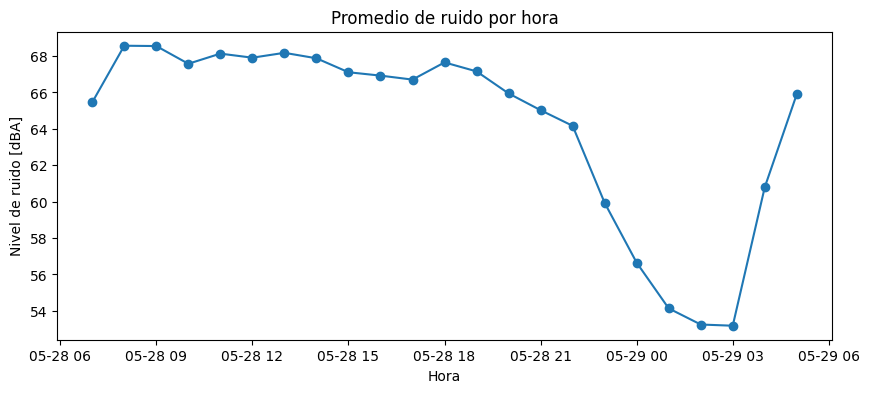

In [95]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_hour.index, df_hour['mean_value'], '-o')
ax.set_title('Promedio de ruido por hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Nivel de ruido [dBA]')
plt.show()

La siguiente tabla muestra el valor promedio por hora del ruido

In [96]:

df_hour['mean_value']


time
2024-05-28 07:00:00+00:00    65.461377
2024-05-28 08:00:00+00:00    68.570861
2024-05-28 09:00:00+00:00    68.552561
2024-05-28 10:00:00+00:00    67.579114
2024-05-28 11:00:00+00:00    68.136268
2024-05-28 12:00:00+00:00    67.912921
2024-05-28 13:00:00+00:00    68.180915
2024-05-28 14:00:00+00:00    67.880318
2024-05-28 15:00:00+00:00    67.112982
2024-05-28 16:00:00+00:00    66.927813
2024-05-28 17:00:00+00:00    66.708352
2024-05-28 18:00:00+00:00    67.653604
2024-05-28 19:00:00+00:00    67.159749
2024-05-28 20:00:00+00:00    65.949255
2024-05-28 21:00:00+00:00    65.026749
2024-05-28 22:00:00+00:00    64.167839
2024-05-28 23:00:00+00:00    59.933375
2024-05-29 00:00:00+00:00    56.644685
2024-05-29 01:00:00+00:00    54.132301
2024-05-29 02:00:00+00:00    53.245779
2024-05-29 03:00:00+00:00    53.179469
2024-05-29 04:00:00+00:00    60.796075
2024-05-29 05:00:00+00:00    65.911917
Freq: h, Name: mean_value, dtype: float64

### Porcentaje de ruido nosivo
A continuacion se muestra una tabla del porcentaje del tiempo en el cual el nivel de ruido rebasa los 65 dBA por hora.

In [97]:
for sono in df:
    df[sono]['over_65dB'] = df[sono]['value'] >65
df1_hour_over65 = df['sono1'].resample('h', on='time').mean()['over_65dB']*100
df2_hour_over65 = df['sono2'].resample('h', on='time').mean()['over_65dB']*100
df3_hour_over65 = df['sono3'].resample('h', on='time').mean()['over_65dB']*100
df4_hour_over65 = df['sono4'].resample('h', on='time').mean()['over_65dB']*100


C:\Users\xavi2\AppData\Local\Temp\ipykernel_3580\384187693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sono]['over_65dB'] = df[sono]['value'] >65


In [98]:

df_hour_over65 = pd.concat([df1_hour_over65, df2_hour_over65, df3_hour_over65, df4_hour_over65], axis=1)
df_hour_over65.columns = ['df1_over_65', 'df2_over_65', 'df3_over_65', 'df4_over_65']


In [99]:

df_hour_over65['mean_over_65dB'] = df_hour_over65.mean(axis=1, skipna=True)
df_hour_over65['mean_over_65dB']

time
2024-05-28 07:00:00+00:00    52.473028
2024-05-28 08:00:00+00:00    76.171652
2024-05-28 09:00:00+00:00    76.374473
2024-05-28 10:00:00+00:00    69.993343
2024-05-28 11:00:00+00:00    72.922928
2024-05-28 12:00:00+00:00    71.465264
2024-05-28 13:00:00+00:00    71.233674
2024-05-28 14:00:00+00:00    68.980525
2024-05-28 15:00:00+00:00    64.817549
2024-05-28 16:00:00+00:00    63.146568
2024-05-28 17:00:00+00:00    60.730327
2024-05-28 18:00:00+00:00    69.562228
2024-05-28 19:00:00+00:00    63.034722
2024-05-28 20:00:00+00:00    56.071263
2024-05-28 21:00:00+00:00    48.423611
2024-05-28 22:00:00+00:00    44.514895
2024-05-28 23:00:00+00:00    20.152778
2024-05-29 00:00:00+00:00    12.687500
2024-05-29 01:00:00+00:00     8.096294
2024-05-29 02:00:00+00:00     6.699938
2024-05-29 03:00:00+00:00     7.083108
2024-05-29 04:00:00+00:00    30.827965
2024-05-29 05:00:00+00:00    55.119265
Freq: h, Name: mean_over_65dB, dtype: float64

La siguiente es una tabla que muestra el promedio de ruido registrado por cada sonometro, ademas de la desviacion estandar y la mediana.

In [100]:
# Crear un data frame con los parametros estadisticos generales
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df:
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df[sono]['value'].mean()
    # desviacion estandar
    desv_value = df[sono]['value'].std()
    # mediana
    med_value = df[sono]['value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_parametros_generales=pd.DataFrame(data, columns=col, index=ind)
df_parametros_generales

,Promedio,Desviacion_estandar,Mediana
sono1,64.352545,7.430233,64.93
sono2,64.117782,7.642283,65.17
sono3,63.936148,8.022884,65.17
sono4,64.398347,7.897464,65.50


Las siguientes graficas muestran el histograma normalizado de los niveles de ruido recabados por cada sonometro.

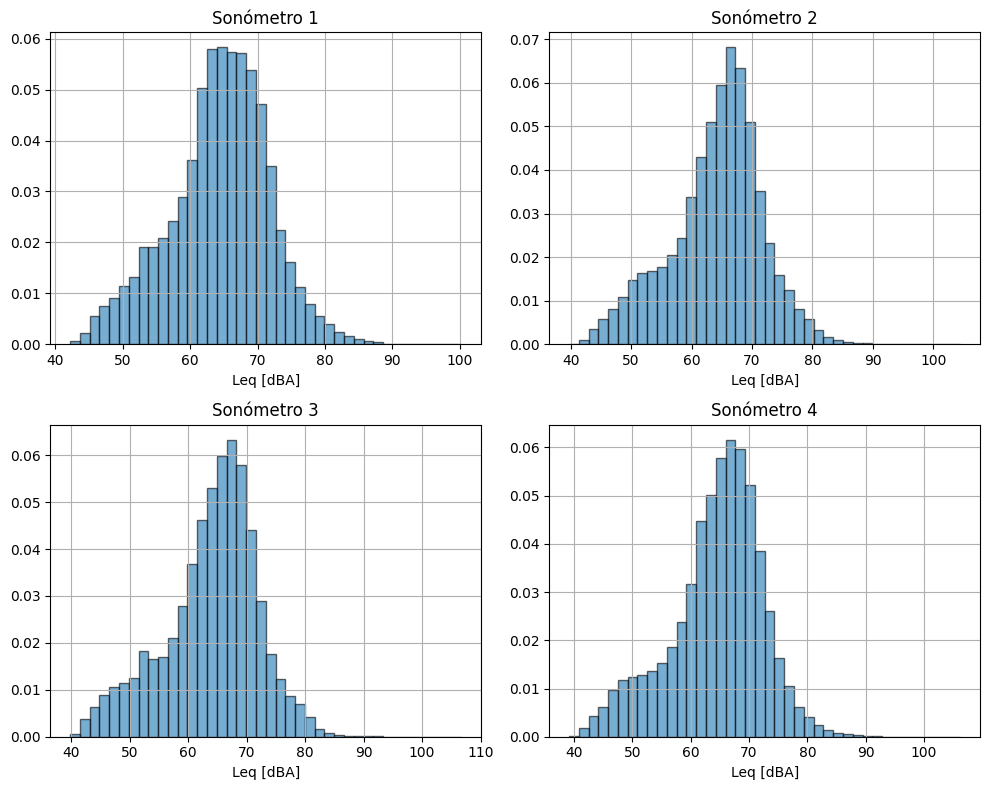

In [101]:
# Generacion de un histograma general para cada sonometro
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Histograma del sonomtro 1
[n, bins, patches]=axs[0, 0].hist(df['sono1']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[0, 0].set_title('Sonómetro 1')
axs[0, 0].set_xlabel('Leq [dBA]')
# axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].grid(True)

# Histograma del sonometro 2
[n, bins, patches]=axs[0, 1].hist(df['sono2']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[0, 1].set_title('Sonómetro 2')
axs[0, 1].set_xlabel('Leq [dBA]')
# axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].grid(True)

# Histograma del sonometro 3
[n, bins, patches]=axs[1, 0].hist(df['sono3']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[1, 0].set_title('Sonómetro 3')
axs[1, 0].set_xlabel('Leq [dBA]')
# axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].grid(True)

# Histograma del sonometro 4
[n, bins, patches]=axs[1, 1].hist(df['sono4']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[1, 1].set_title('Sonómetro 4')
axs[1, 1].set_xlabel('Leq [dBA]')
# axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].grid(True)

fig.tight_layout()
plt.show()

In [102]:
# Histograma general combinando a los cuatro sonometros
common_time = pd.date_range(start=min(df[sono]['time'].min() for sono in df), 
                            end=max(df[sono]['time'].max() for sono in df), 
                            freq='S')
dfs_reindexed = []
for sono in df:
    df_reindexed = df[sono].set_index('time').reindex(common_time)
    df_reindexed['time']=df_reindexed.index.to_series().interpolate() # Interpola valores faltantes
    dfs_reindexed.append(df_reindexed['value'])
df_concat = pd.concat(dfs_reindexed, axis=1)
df_concat['mean_value'] = df_concat['value'].mean(axis=1, skipna=True)
df_result = df_concat.reset_index().rename(columns={'index': 'time'})

df_general=df_result[['time', 'mean_value']]



C:\Users\xavi2\AppData\Local\Temp\ipykernel_3580\1193334104.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  common_time = pd.date_range(start=min(df[sono]['time'].min() for sono in df),


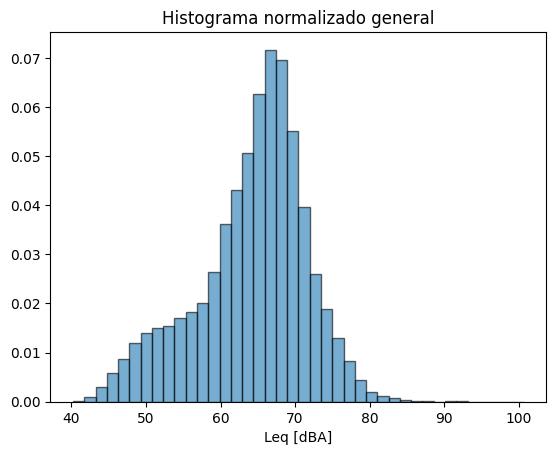

In [103]:

plt.hist(df_general['mean_value'], bins=40, edgecolor='k', alpha=0.6, density=True)
plt.title('Histograma normalizado general')
plt.xlabel('Leq [dBA]')
plt.show()

## Analisis para el nivel de ruido durante el periodo diurno y noctutno
A continuacion se presenta un analisis estadistico de los niveles de ruido registrados durante el periodo diurno (6:00 - 20:00) y nocturno (6:00 - 20:00).

Estos datos son mas utiles porque debido a que el ruido no es igual durante el dia y durante la noche. Esto se puede ver facilmente en la grafica del "Promedio del ruido por hora".

### Periodo diurno
+ Promedio del ruido
+ Desviacion estandar
+ Mediana

In [104]:
# Definir el rango de tiempo deseado
start_time = '2024-05-28 06:00:00'
end_time = '2024-05-28 20:00:00'

# Crear un data frame con los parametros estadisticos del periodo diurno
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df:
    # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = filtered_df['value'].mean()
    # desviacion estandar
    desv_value = filtered_df['value'].std()
    # mediana
    med_value = filtered_df['value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_parametros_diurnos=pd.DataFrame(data, columns=col, index=ind)
df_parametros_diurnos

,Promedio,Desviacion_estandar,Mediana
sono1,67.685384,5.266668,67.32
sono2,67.540506,5.138329,67.19
sono3,67.582179,5.222957,67.38
sono4,67.613347,5.312847,67.48


Histograma de los valores de ruido durante el periodo diurno


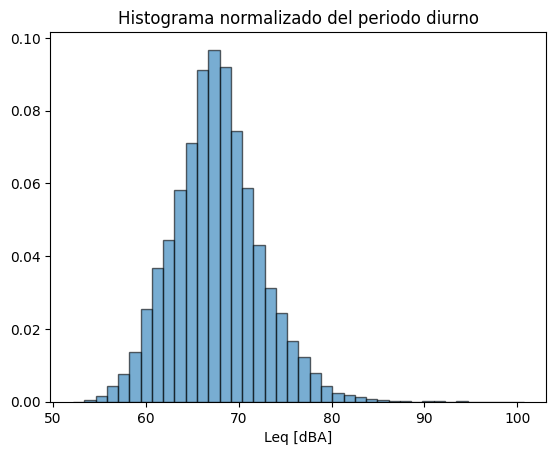

In [105]:
# Histograma de los valores de ruido para el periodo diurno
df_diurno=df_general[(df_general['time']>=start_time) & (df_general['time']<=end_time)]
plt.hist(df_diurno['mean_value'], bins=40, edgecolor='k', alpha=0.6, density=True)
plt.title('Histograma normalizado del periodo diurno')
plt.xlabel('Leq [dBA]')
plt.show()

### Periodo nocturno

In [106]:
# Definir el rango de tiempo deseado
start_time = '2024-05-28 20:00:00'
end_time = '2024-05-29 06:00:00'

# Crear un data frame con los parametros estadisticos del periodo dnocturno
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df:
    # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = filtered_df['value'].mean()
    # desviacion estandar
    desv_value = filtered_df['value'].std()
    # mediana
    med_value = filtered_df['value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_parametros_diurnos=pd.DataFrame(data, columns=col, index=ind)
df_parametros_diurnos

,Promedio,Desviacion_estandar,Mediana
sono1,60.467591,7.693419,60.42
sono2,59.868368,8.095267,60.02
sono3,58.245815,8.313880,58.13
sono4,59.232425,8.598613,59.52


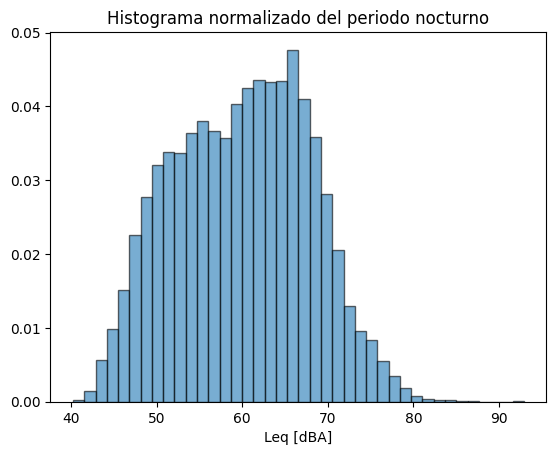

In [107]:
df_nocturno=df_general[(df_general['time']>=start_time) & (df_general['time']<=end_time)]
plt.hist(df_nocturno['mean_value'], bins=40, edgecolor='k', alpha=0.6, density=True)
plt.title('Histograma normalizado del periodo nocturno')
plt.xlabel('Leq [dBA]')
plt.show()

### Niveles percentiles
Los niveles percentiles de ruido son métricas que ayudan a entender la variabilidad y la distribución de los niveles de ruido en un período de tiempo. Un nivel percentil, como el L10, indica que el nivel de ruido fue igual o superado durante el 10% del tiempo. De manera similar, el L50 y el L90 indican los niveles de ruido que se igualaron o superaron el 50% y el 90% del tiempo, respectivamente. Estos valores son útiles para identificar los niveles de ruido más comunes y los picos de ruido en un entorno específico.

In [108]:
# crear un dataframe con los niveles percentiles de cada sonometro
data = []
col = ['L10', 'L50', 'L90']
ind = []
for sono in df:
    L10 = df[sono]['value'].quantile(0.10)
    L50 = df[sono]['value'].quantile(0.50)
    L90 = df[sono]['value'].quantile(0.90)
    data.append([L10, L50, L90])
    ind.append(sono)
df_percentiles = pd.DataFrame(data, columns=col, index=ind)
df_percentiles

,L10,L50,L90
sono1,53.80,64.93,72.93
sono2,52.79,65.17,72.77
sono3,52.04,65.17,72.82
sono4,52.60,65.50,73.24


#### Horario diurno

In [109]:
data = []
col = ['L10', 'L50', 'L90']
ind = []
for sono in df:
    df_filtered = df[sono][(df[sono]['time']>='2024-05-28 06:00:00') & (df[sono]['time']<='2024-05-28 20:00:00')]
    L10 = df_filtered['value'].quantile(0.10)
    L50 = df_filtered['value'].quantile(0.50)
    L90 = df_filtered['value'].quantile(0.90)
    data.append([L10, L50, L90])
    ind.append(sono)
df_percentiles = pd.DataFrame(data, columns=col, index=ind)
df_percentiles

,L10,L50,L90
sono1,61.49,67.32,74.440
sono2,61.30,67.19,74.170
sono3,61.06,67.38,74.207
sono4,60.99,67.48,74.240


##### Horario nocturno

In [110]:
data = []
col = ['L10', 'L50', 'L90']
ind = []
for sono in df:
    df_filtered = df[sono][(df[sono]['time']>='2024-05-28 20:00:00') & (df[sono]['time']<='2024-05-29 06:00:00')]
    L10 = df_filtered['value'].quantile(0.10)
    L50 = df_filtered['value'].quantile(0.50)
    L90 = df_filtered['value'].quantile(0.90)
    data.append([L10, L50, L90])
    ind.append(sono)
df_percentiles = pd.DataFrame(data, columns=col, index=ind)
df_percentiles

,L10,L50,L90
sono1,50.349,60.42,70.48
sono2,49.190,60.02,70.04
sono3,47.140,58.13,68.98
sono4,47.620,59.52,70.26


## Identificación de los eventos ruidosos

Con el fin de encontrar los parámetros estadísticos mencionados al inicio de este documento, es útil buscar, a lo largo del tiempo, "eventos ruidosos" en los cuales los niveles de ruido rebasan el umbral de 65 dB. Se considerará que un evento inicia cuando el ruido supera este umbral y termina cuando decae por debajo de él. Las características de estos eventos son:
+ Hora en que inicia: `start_time`.
+ Hora en que finaliza: `end_time`.
+ Valor máximo del ruido durante este evento: `max_values`.
+ Valor promedio del ruido durante este evento: `avg_values`.


### Estadistica general de los eventos ruidosos
A continuacion se presentan el promedio, media y desviacion estandar de cada uno de los parametros de los eventos ruidosos. 

In [111]:
# cargar los dataframes de los eventos ruidosos
df1=pd.read_csv('dataframe_eventos_sono1.csv')
df2=pd.read_csv('dataframe_eventos_sono2.csv')
df3=pd.read_csv('dataframe_eventos_sono3.csv')
df4=pd.read_csv('dataframe_eventos_sono4.csv')
df_eventos = {'sono1':df1, 'sono2':df2, 'sono3':df3, 'sono4':df4}
df_eventos['sono1']

,start_time,end_time,max_value,avg_value,length,duration,time_diff
0,2024-05-28 07:31:01+00:00,2024-05-28 07:31:05+00:00,75.11,70.852500,4,4.0,4.0
1,2024-05-28 07:31:14+00:00,2024-05-28 07:31:17+00:00,80.73,76.856667,3,3.0,13.0
2,2024-05-28 07:31:18+00:00,2024-05-28 07:31:25+00:00,75.34,71.037143,7,7.0,4.0
3,2024-05-28 07:31:58+00:00,2024-05-28 07:32:01+00:00,70.73,69.600000,3,3.0,40.0
4,2024-05-28 07:32:08+00:00,2024-05-28 07:32:13+00:00,73.84,68.658000,5,5.0,10.0
...,...,...,...,...,...,...,...
1784,2024-05-29 05:57:16+00:00,2024-05-29 05:57:29+00:00,75.30,71.155385,13,13.0,32.0
1785,2024-05-29 05:58:05+00:00,2024-05-29 05:58:09+00:00,68.85,67.862500,4,4.0,49.0
1786,2024-05-29 05:58:17+00:00,2024-05-29 05:58:36+00:00,83.43,71.321579,19,19.0,12.0
1787,2024-05-29 05:58:48+00:00,2024-05-29 05:59:01+00:00,83.36,73.982308,13,13.0,31.0


#### Duración de los eventos ruidosos

In [112]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['duration'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['duration'].std()
    # mediana
    med_value = df_eventos[sono]['duration'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_duracion_eventos=pd.DataFrame(data, columns=col, index=ind)
df_duracion_eventos

,Promedio,Desviacion_estandar,Mediana
sono1,19.569592,30.542875,8.0
sono2,20.212566,31.622489,8.0
sono3,21.923323,32.729622,8.0
sono4,21.577970,33.389290,9.0


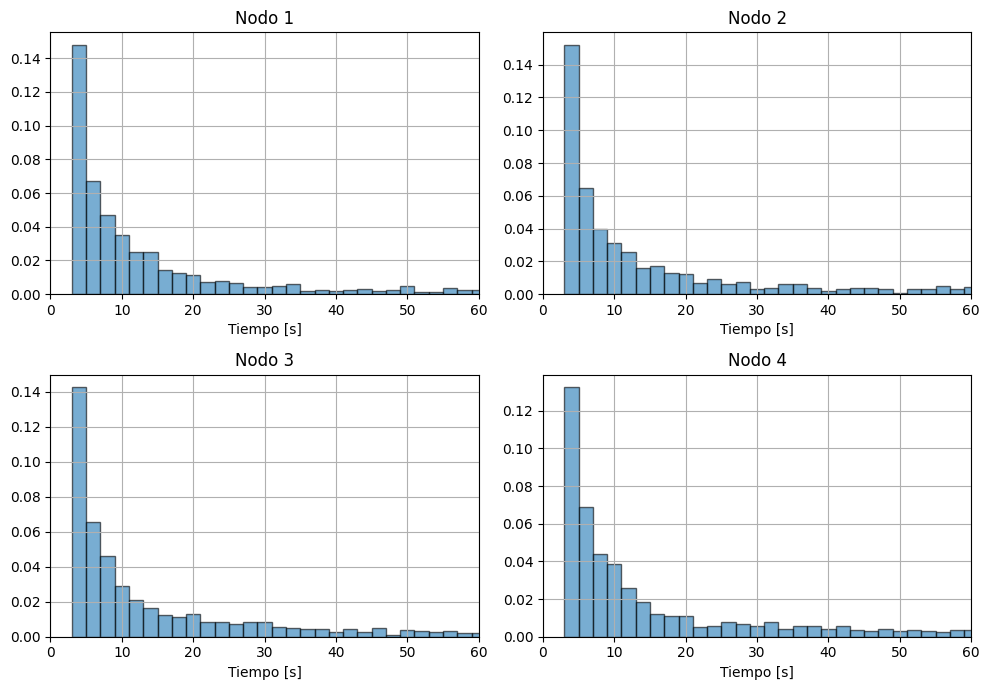

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 2
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['duration'].min()
        max_data = df_eventos[f'sono{sono}']['duration'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['duration'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        # axs[i, j].set_title(f'Histograma normalizado\nde la duración de los eventos ruidosos\nregistrados por el sonómetro {sono}')
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Tiempo [s]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        axs[i, j].set_xlim([0, 60])

fig.tight_layout()
plt.show()

#### Valor promedio del nivel de los eventos ruidosos


In [115]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['avg_value'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['avg_value'].std()
    # mediana
    med_value = df_eventos[sono]['avg_value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_duracion_eventos=pd.DataFrame(data, columns=col, index=ind)
df_duracion_eventos

,Promedio,Desviacion_estandar,Mediana
sono1,68.840024,2.287323,68.613333
sono2,68.623719,2.156365,68.291000
sono3,68.669428,2.202917,68.294000
sono4,68.857056,2.189170,68.638833


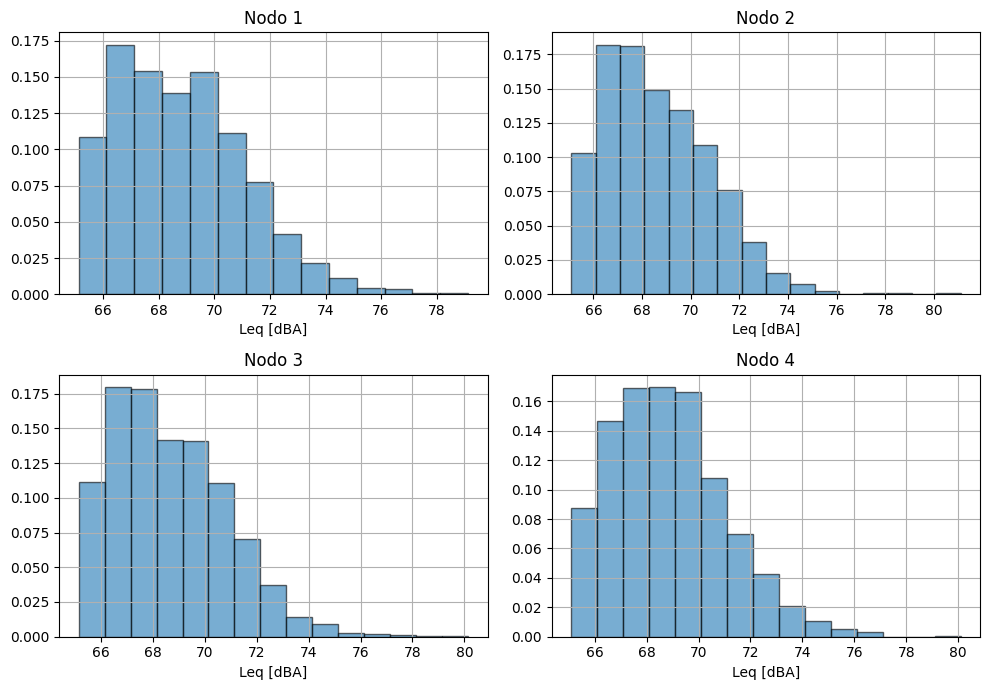

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 1
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['avg_value'].min()
        max_data = df_eventos[f'sono{sono}']['avg_value'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['avg_value'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        # axs[i, j].set_title(f'Histograma normalizado\ndel valor promedio de los eventos ruidosos\nregistrados por el sonómetro {sono}')
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Leq [dBA]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        # axs[i, j].set_xlim([0, 100])

fig.tight_layout()
plt.show()

#### Tiempo entre eventos ruidosos

In [117]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['time_diff'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['time_diff'].std()
    # mediana
    med_value = df_eventos[sono]['time_diff'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_duracion_eventos=pd.DataFrame(data, columns=col, index=ind)
df_duracion_eventos

,Promedio,Desviacion_estandar,Mediana
sono1,44.233091,52.174118,26.0
sono2,44.758074,50.357840,27.0
sono3,46.645367,54.617668,28.0
sono4,43.795173,48.615069,27.0


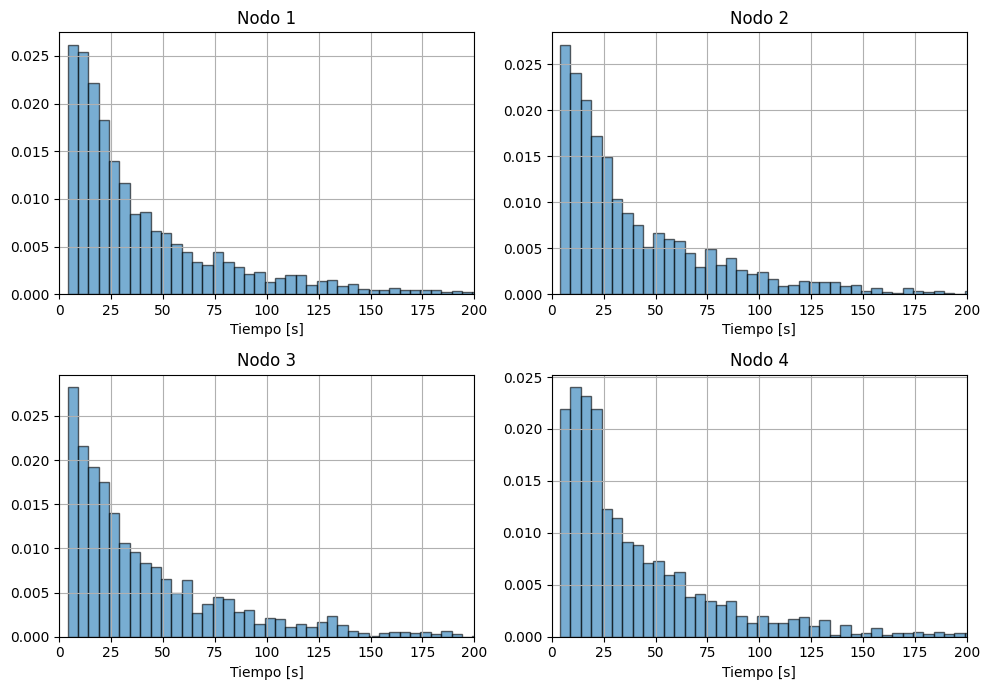

In [118]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 5
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['time_diff'].min()
        max_data = df_eventos[f'sono{sono}']['time_diff'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['time_diff'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Tiempo [s]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        axs[i, j].set_xlim([0, 200])

fig.tight_layout()
plt.show()

In [119]:
events_df=df_eventos['sono1'].sort_values(by='duration')
events_df

,start_time,end_time,max_value,avg_value,length,duration,time_diff
1788,2024-05-29 05:59:18+00:00,2024-05-29 05:59:21+00:00,67.33,66.680000,3,3.0,30.0
1156,2024-05-28 20:50:48+00:00,2024-05-28 20:50:51+00:00,67.82,66.236667,3,3.0,48.0
1160,2024-05-28 20:52:45+00:00,2024-05-28 20:52:48+00:00,66.38,65.653333,3,3.0,13.0
1161,2024-05-28 20:52:56+00:00,2024-05-28 20:52:59+00:00,66.46,65.793333,3,3.0,11.0
1162,2024-05-28 20:53:20+00:00,2024-05-28 20:53:23+00:00,68.45,66.796667,3,3.0,24.0
...,...,...,...,...,...,...,...
387,2024-05-28 13:01:55+00:00,2024-05-28 13:05:29+00:00,87.78,71.675280,214,214.0,5.0
1701,2024-05-29 04:51:16+00:00,2024-05-29 04:54:56+00:00,82.22,70.082909,220,220.0,18.0
107,2024-05-28 08:52:45+00:00,2024-05-28 08:56:32+00:00,86.43,70.936079,227,227.0,7.0
393,2024-05-28 13:08:19+00:00,2024-05-28 13:12:20+00:00,87.96,71.065021,241,241.0,11.0


#### Valor máximo de los eventos ruidosos

In [120]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['max_value'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['max_value'].std()
    # mediana
    med_value = df_eventos[sono]['max_value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_max_value=pd.DataFrame(data, columns=col, index=ind)
df_max_value

,Promedio,Desviacion_estandar,Mediana
sono1,73.714651,6.262037,72.02
sono2,73.189237,5.813038,71.59
sono3,73.329508,5.855773,71.84
sono4,73.606807,5.948413,72.02


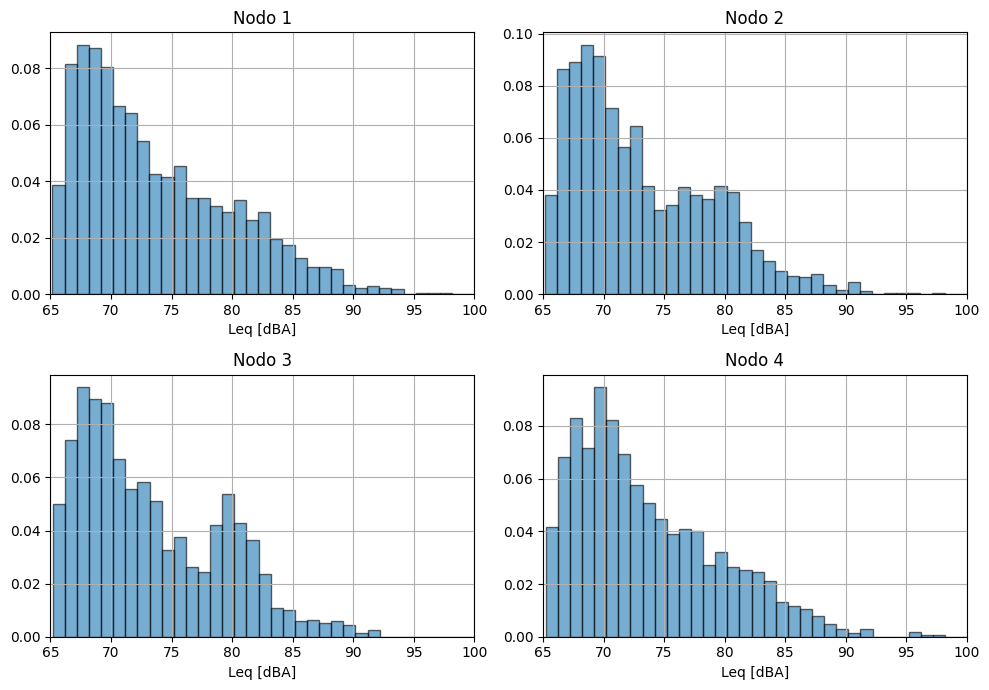

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 1
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['max_value'].min()
        max_data = df_eventos[f'sono{sono}']['max_value'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['max_value'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        # axs[i, j].set_title(f'Histograma normalizado\ndel valor máximo de los eventos ruidosos\nregistrados por el sonómetro {sono}')
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Leq [dBA]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        axs[i, j].set_xlim([65, 100])

fig.tight_layout()
plt.show()

## Hora de mayor ocurrencia de los eventos ruidosos
Hora de mayor ocurrencia de los eventos ruidosos y el número de eventos ruidosos registrados por cada nodo

In [122]:
df_eventos['sono4']['avg_value'].size

1616

In [123]:
# most_common_hour = events_df['start_time'].dt.hour.mode()[0]
# crear un dataframe con la hora de inicio de eventos mas comun
data=[]
ind=[]
col=['Hora_mas_comun', 'Numero_de_eventos']
for sono in df_eventos:
    df_eventos[sono]['start_time']=pd.to_datetime(df_eventos[sono]['start_time'])
    df_eventos[sono]['end_time']=pd.to_datetime(df_eventos[sono]['end_time'])
    most_common_hour = df_eventos[sono]['start_time'].dt.hour.mode()[0]
    numero_eventos = df_eventos[sono]['avg_value'].size
    data.append([most_common_hour, numero_eventos])
    ind.append(sono)
df_most_common_hour = pd.DataFrame(data, columns=col, index=ind)
df_most_common_hour

,Hora_mas_comun,Numero_de_eventos
sono1,21,1789
sono2,21,1703
sono3,21,1565
sono4,21,1616
